In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
df = pd.read_table("/content/Restaurant_Reviews.tsv")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [230]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [231]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [232]:
count = 0
for i in df['Review']:
  df.iloc[count,0] = i.lower()
  count+=1
df

,Review,Liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
...,...,...
995,i think food should have flavor and texture an...,0
996,appetite instantly gone.,0
997,overall i was not impressed and would not go b...,0
998,"the whole experience was underwhelming, and i ...",0


In [233]:
df.iloc[:,1] = df.iloc[:,1].replace([0,1],["Negative","Positive"])

In [234]:
df

,Review,Liked
0,wow... loved this place.,Positive
1,crust is not good.,Negative
2,not tasty and the texture was just nasty.,Negative
3,stopped by during the late may bank holiday of...,Positive
4,the selection on the menu was great and so wer...,Positive
...,...,...
995,i think food should have flavor and texture an...,Negative
996,appetite instantly gone.,Negative
997,overall i was not impressed and would not go b...,Negative
998,"the whole experience was underwhelming, and i ...",Negative


In [235]:
df['Liked'].value_counts()

Positive    500
Negative    500
Name: Liked, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


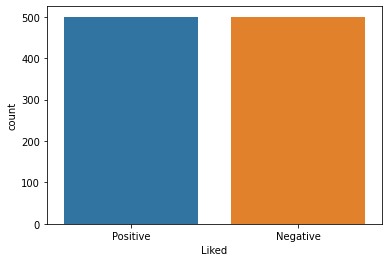

In [236]:
sns.countplot(df['Liked'])

In [237]:
x = df['Review']
y = df['Liked']

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.20,train_size=0.80)

In [240]:
x_train

687    the decor is nice, and the piano music soundtr...
500    i also had to taste my mom's multi-grain pumpk...
332    we had fantastic service, and were pleased by ...
979    i kept looking at the time and it had soon bec...
817      the seasonal fruit was fresh white peach puree.
                             ...                        
835    i paid the bill but did not tip because i felt...
192    when my order arrived, one of the gyros was mi...
629    the staff is always super friendly and helpful...
559                                i *heart* this place.
684                                     damn good steak.
Name: Review, Length: 800, dtype: object

In [241]:
y_train

687    Positive
500    Positive
332    Positive
979    Negative
817    Positive
         ...   
835    Negative
192    Negative
629    Positive
559    Positive
684    Positive
Name: Liked, Length: 800, dtype: object

Using SVC and COUNT VECTORIZER

In [242]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [243]:
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)
x_train_vect

<800x1772 sparse matrix of type '<class 'numpy.int64'>'
	with 7878 stored elements in Compressed Sparse Row format>

In [244]:
from sklearn.svm import SVC
model1 = SVC()

In [245]:
model1.fit(x_train_vect,y_train)

SVC()

In [246]:
y_pred1 = model1.predict(x_test_vect)
y_pred1

array(['Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negati

In [247]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [248]:
confusion_matrix(y_test,y_pred1)

array([[78, 19],
       [23, 80]])

In [249]:
ac1 = accuracy_score(y_test,y_pred1)
ac1

0.79

In [250]:
model1.score(x_test_vect,y_test)

0.79

SVC with PIPELINE

In [251]:
from sklearn.pipeline import make_pipeline

In [252]:
model2 = make_pipeline(CountVectorizer(),SVC())

In [253]:
model2.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [254]:
y_pred2 = model2.predict(x_test)
y_pred2

array(['Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negati

In [255]:
confusion_matrix(y_test,y_pred2)

array([[78, 19],
       [23, 80]])

In [256]:
ac2 = accuracy_score(y_test,y_pred2)
ac2

0.79

In [257]:
model2.score(x_test,y_test)

0.79

SELECTING MODEL WITH HIGHEST ACCURACY AS FINAL MODEL AND CREATE A JOBLIB FILE

In [258]:
import joblib

In [259]:
joblib.dump(model2,'Restaurant_Review_Analysis_SVC')

['Restaurant_Review_Analysis_SVC']

In [260]:
reloaded_model1 = joblib.load('Restaurant_Review_Analysis_SVC')
reloaded_model1

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [261]:
reloaded_model1.score(x_test,y_test)

0.79

In [262]:
reloaded_model1.predict(["Food was very good"])

array(['Positive'], dtype=object)

In [263]:
reloaded_model1.predict(["Did not like the taste"])

array(['Negative'], dtype=object)

NAIVE BAYES AND COUNT VECTORIZER

In [264]:
from sklearn.model_selection import train_test_split

In [265]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.20,train_size=0.80)

In [266]:
x_train

687    the decor is nice, and the piano music soundtr...
500    i also had to taste my mom's multi-grain pumpk...
332    we had fantastic service, and were pleased by ...
979    i kept looking at the time and it had soon bec...
817      the seasonal fruit was fresh white peach puree.
                             ...                        
835    i paid the bill but did not tip because i felt...
192    when my order arrived, one of the gyros was mi...
629    the staff is always super friendly and helpful...
559                                i *heart* this place.
684                                     damn good steak.
Name: Review, Length: 800, dtype: object

In [267]:
y_train

687    Positive
500    Positive
332    Positive
979    Negative
817    Positive
         ...   
835    Negative
192    Negative
629    Positive
559    Positive
684    Positive
Name: Liked, Length: 800, dtype: object

In [268]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [269]:
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)
x_train_vect

<800x1772 sparse matrix of type '<class 'numpy.int64'>'
	with 7878 stored elements in Compressed Sparse Row format>

In [270]:
from sklearn.naive_bayes import MultinomialNB

In [271]:
model3 = MultinomialNB()

In [272]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [273]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array(['Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negati

In [274]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [275]:
confusion_matrix(y_test,y_pred3)

array([[81, 16],
       [22, 81]])

In [276]:
ac3 = accuracy_score(y_test,y_pred3)
ac3

0.81

In [277]:
model3.score(x_test_vect,y_test)

0.81

NAIVE BAYES WITH PIPELINING

In [278]:
from sklearn.pipeline import make_pipeline

In [279]:
model4 = make_pipeline(CountVectorizer(),MultinomialNB())

In [280]:
model4.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [281]:
y_pred4 = model4.predict(x_test)
y_pred4

array(['Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negati

In [282]:
confusion_matrix(y_test,y_pred4)

array([[81, 16],
       [22, 81]])

In [283]:
ac4 = accuracy_score(y_test,y_pred4)

In [284]:
model4.score(x_test,y_test)

0.81

SELECTING MODEL WITH HIGHEST ACCURACY AS FINAL MODEL AND CREATE A JOBLIB FILE

In [285]:
import joblib

In [286]:
joblib.dump(model4,'Restaurant_Review_Analysis_NB')

['Restaurant_Review_Analysis_NB']

In [287]:
reloaded_model2 = joblib.load('Restaurant_Review_Analysis_NB')
reloaded_model2

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [288]:
reloaded_model2.score(x_test,y_test)

0.81

In [289]:
reloaded_model2.predict(['wow what an good restaurant'])

array(['Positive'], dtype='<U8')

In [290]:
reloaded_model2.predict(['tastes horrible and place is also not well maintained'])

array(['Negative'], dtype='<U8')

STREAMLIT DEPLOYMENT

In [291]:
!pip install -q streamlit

In [292]:
%%writefile review_app.py
import streamlit as st
import joblib

reloaded_model1 = joblib.load('Restaurant_Review_Analysis_SVC')
reloaded_model2 = joblib.load('Restaurant_Review_Analysis_NB')

st.title("      RESTAURANT REVIEW ANALYSIS      ")
st.header("The model with highest accuracy is :")
st.write(reloaded_model2)

# Enter the user review
review = st.text_input("Enter your review of the restaurant: ")

if not review:
  st.warning("Please Enter a review")
  st.stop()
st.success("Thank you for giving your review.")

#Predict output on basis of input
output = reloaded_model2.predict([review])

# If the predict button is pressed it gives the output in webapp
if st.button("Predict"):
    st.title(output[0])

Overwriting review_app.py


In [ ]:
#Run the streamlit webapp
!streamlit run review_app.py & npx localtunnel --port 8501

2022-08-07 09:56:34.112 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 3.074s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.125.253.176:8501

